In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objs as go
from sklearn.feature_selection import RFE

In [2]:
train_data=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Home-Loan-Prediction\\Dataset\\train.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
categorical_features=[]
numerical_features=[]

In [7]:
my_columns=train_data.columns.tolist()

In [8]:
my_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [9]:
for i in my_columns:
    if train_data[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [10]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [11]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Check Missing Values

In [12]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Figure size 720x360 with 0 Axes>

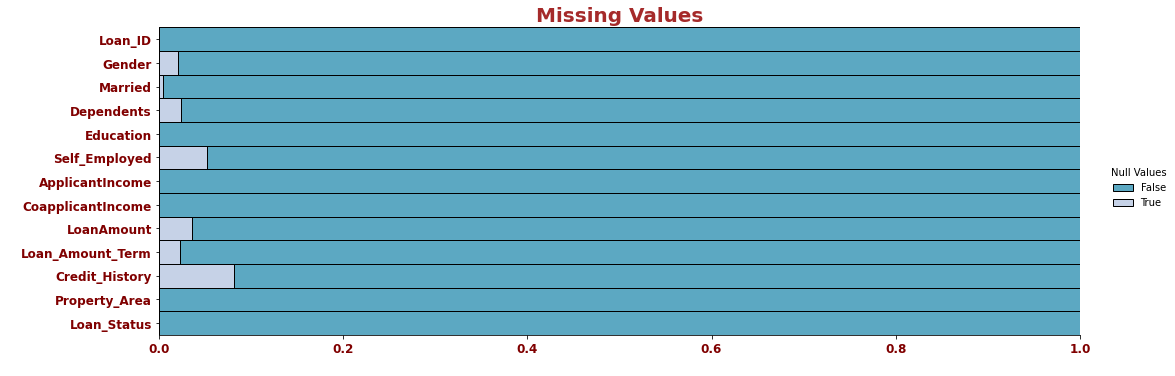

In [13]:
plt.figure(figsize=(10, 5))
sns.displot(
data = train_data.isna().melt(value_name="Null Values"),
y = "variable",
hue = "Null Values",
multiple="fill",
aspect=3,
palette='PuBuGn_r' 
)
plt.title('Missing Values', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');


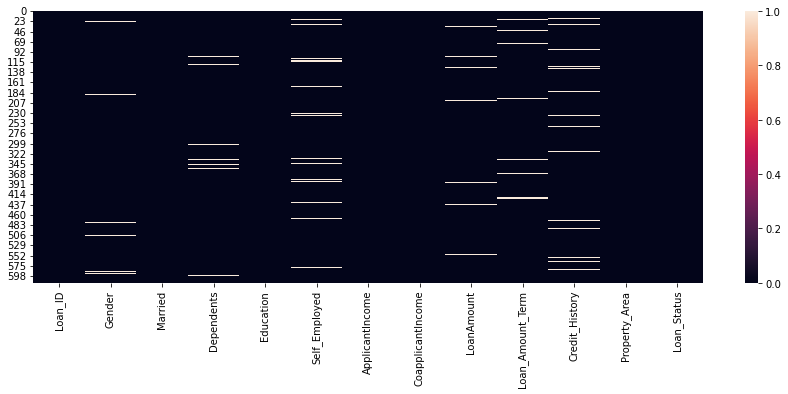

In [14]:
plt.figure(figsize=(15, 5))
sns.heatmap(train_data.isnull())
plt.show()

In [71]:
train_data[train_data.isnull().any(axis=1)].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N


In [22]:
my_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [54]:
un_cols=["Gender","Married","Education","Self_Employed","Credit_History","Loan_Status","Property_Area"]

In [62]:
for col in un_cols:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(train_data[col].value_counts())
    print("Percentage")
    print("-------------------")
    print(np.round(train_data[col].value_counts(normalize=True)*100))

-------------------
Column Name Is Gender
-------------------
Male      489
Female    112
Name: Gender, dtype: int64
Percentage
-------------------
Male      81.0
Female    19.0
Name: Gender, dtype: float64
-------------------
Column Name Is Married
-------------------
Yes    398
No     213
Name: Married, dtype: int64
Percentage
-------------------
Yes    65.0
No     35.0
Name: Married, dtype: float64
-------------------
Column Name Is Education
-------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Percentage
-------------------
Graduate        78.0
Not Graduate    22.0
Name: Education, dtype: float64
-------------------
Column Name Is Self_Employed
-------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
Percentage
-------------------
No     86.0
Yes    14.0
Name: Self_Employed, dtype: float64
-------------------
Column Name Is Credit_History
-------------------
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Percentage
-

# Filling Missing Values

In [72]:
train_data.Gender = train_data.Gender.fillna("Female")

In [74]:
train_data.Married = train_data.Married .fillna("No")

In [73]:
train_data["Gender"].value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

In [75]:
train_data["Married"].value_counts()

Yes    398
No     216
Name: Married, dtype: int64